# Statistic Analysis

In [2]:
import pandas as pd
import matplotlib as plt
import numpy as np
from time import time
import math
import os

In [7]:
import os
def symbol_to_path(symbol, base_dir="data"):
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))
# dates = pd.date_range('2010-01-01', '2010-12-31')
# symbols = ['GOOG','IBM','GLD']
def get_data(symbols, dates):
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')
    print(symbols)
    for symbol in symbols:
        df_temp=pd.read_csv(symbol_to_path(symbol), index_col="Date", 
                     parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp=df_temp.rename(columns={'Adj Close': symbol})
        if symbol == 'SPY':
            df=df.join(df_temp, how='inner')
        else:
            df=df.join(df_temp)

    return df
# Notebook setting plot size
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
def normalize_data(df):
    return df/df.ix[0]
def plot_data(df, title="Stock Prices"):
    ax = df.plot(title=title, fontsize=10)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()
def plot_selected(df, columns, start_index, end_index):
    df = df.ix[start_index:end_index, columns]
    plot_data(df)
# plot_selected(df, ['SPY', 'IBM'], '2010-03-01', '2010-04-01')

Populating the interactive namespace from numpy and matplotlib


D:\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Mean, Median, Standard Deviation

['SPY', 'GOOG', 'GLD']


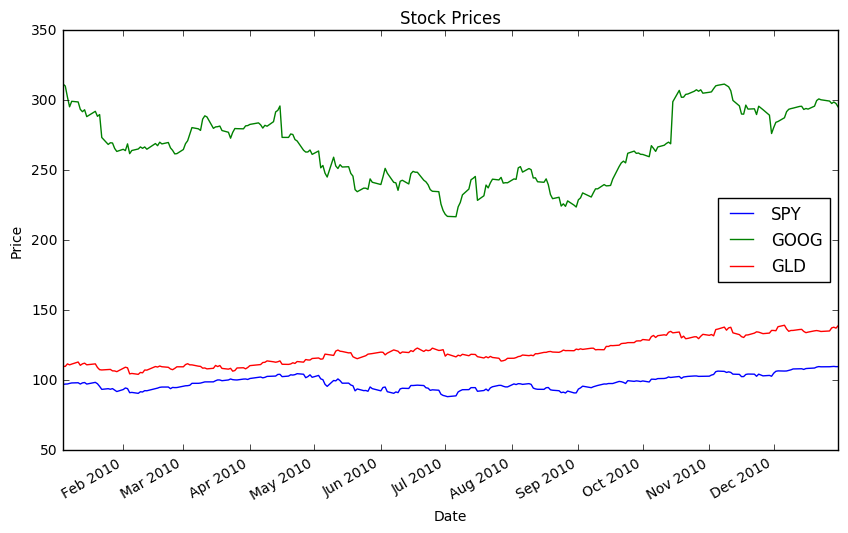

-----MEAN
SPY      98.342140
GOOG    266.080947
GLD     120.069762
dtype: float64
-----MEDIAN
SPY      97.594398
GOOG    265.433609
GLD     118.754998
dtype: float64
-----STD
SPY      5.103005
GOOG    25.067321
GLD      9.537110
dtype: float64


In [3]:
dates = pd.date_range('2010-01-01', '2010-12-31')
symbols = ['SPY', 'GOOG', 'GLD']
df = get_data(symbols, dates)
plot_data(df)
print("-----MEAN\n" + str(df.mean()))
print("-----MEDIAN\n" + str(df.median()))
print("-----STD\n" + str(df.std()))

# Moving Statistics(Rolling), Bollinger Bands

['SPY']


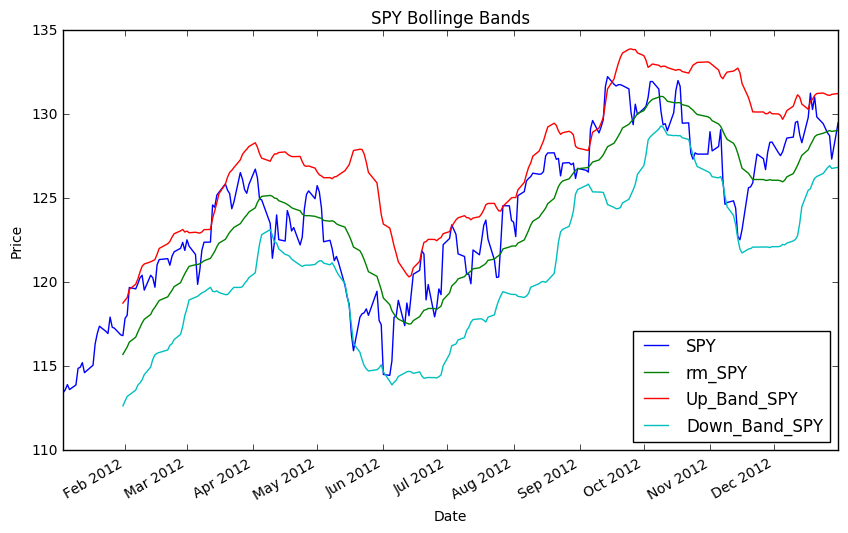

In [4]:
#rolling_mean params - window
dates = pd.date_range('2012-01-01', '2012-12-31')
symbols = ['SPY']
df = get_data(symbols, dates)

def bollinge_bonds(df):
    rm_SPY = pd.Series.rolling(df, window=20).mean()
    rstd_SPY = pd.Series.rolling(df, window=20).std()
    up_bond = rm_SPY + (2*rstd_SPY)
    down_bond = rm_SPY - (2*rstd_SPY)
    return rm_SPY, up_bond, down_bond

df['rm_SPY'], df['Up_Band_SPY'], df['Down_Band_SPY'] = bollinge_bonds(df['SPY'])
plot_data(df, title= "SPY Bollinge Bands")

# Dayily Returns

['SPY', 'XOM']


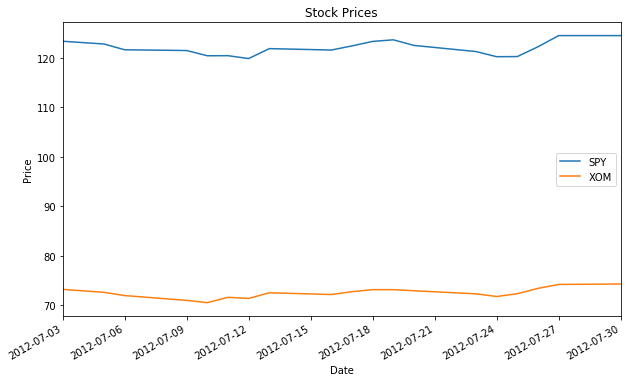

In [10]:
#dayly rets
dates = pd.date_range('2012-07-03', '2012-07-30')
symbols = ['SPY', 'XOM']
df = get_data(symbols, dates)
plot_data(df)

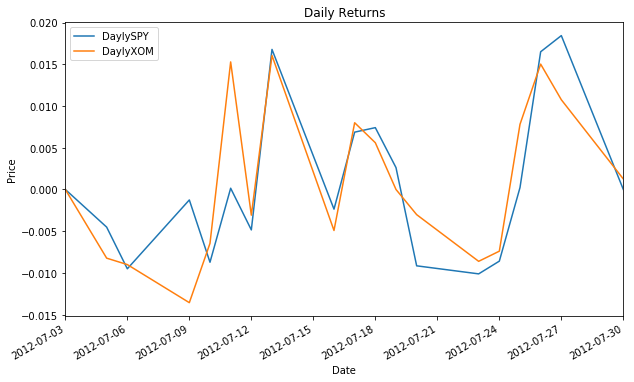

In [11]:
#dayly rets
#numpy
def daily_returns_numpy(df):
    daily_returns = df.copy()
    daily_returns[1:] = (df[1:] / df[:-1].values) - 1
    daily_returns.ix[0, :] = 0
    return daily_returns
#pandas
def daily_returns_pandas(df):
    daily_returns = (df / df.shift(1)) - 1
    daily_returns.ix[0, :] = 0
    return daily_returns
daily = daily_returns_pandas(df)
daily.columns = map(lambda x: 'Dayly'+x, daily.columns)
plot_data(daily, title='Daily Returns')


# Cumulative Returns

123.397011
Cumulative return day 5 -0.0236518208695 = 120.478447 / 123.397011


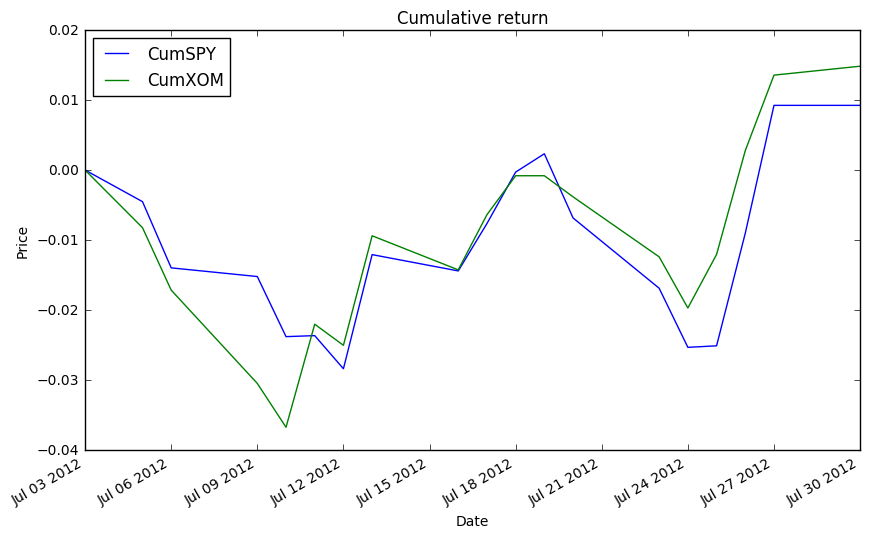

In [115]:
#cumulative return
def cumulative_return(df):
    df_cum = (df / df.ix[0, :]) - 1
    return df_cum
print(df.ix[0, :]['SPY'])
cum_ret = cumulative_return(df)
day = 5
print("Cumulative return day", day, cum_ret.ix[day]['SPY'], '=', df.ix[day, :]['SPY'], '/', df.ix[0, :]['SPY'])
cum_ret.columns = map(lambda x: 'Cum'+x, cum_ret.columns)
plot_data(cum_ret, title='Cumulative return')

# Sharpe Ratio

In [2]:
import math
math.sqrt(25)

5.0

In [4]:
#daily sharpe ration
def sharpe_ration(daily_rets, daily_rf, sampling_freq):
    return math.sqrt(sampling_freq) * (daily_rets - daily_rf).mean() / daily_rets.std()

def sharpe_ratio_dayily(daily_rets, daily_rf):
    return sharpe_ration(daily_rets, daily_rf, 252)
def sharpe_ratio_weekly(daily_rets, daily_rf):
    return sharpe_ration(daily_rets, daily_rf, 52)
def sharpe_ratio_monthly(daily_rets, daily_rf):
    return sharpe_ration(daily_rets, daily_rf, 12)

['SPY', 'GOOG', 'GLD']


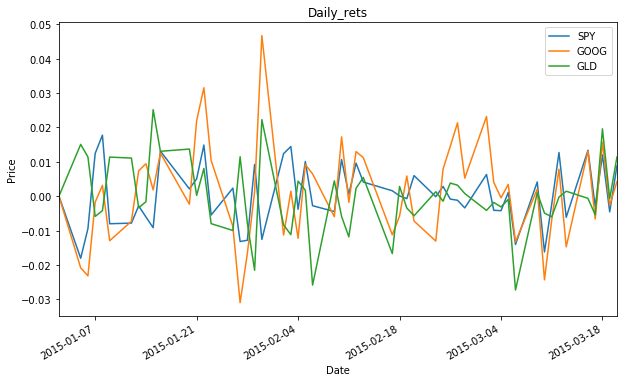

Sharpe ratio:
 SPY     1.013690
GOOG    1.457204
GLD    -0.042362
dtype: float64


In [20]:
dates = pd.date_range('2015-01-01', '2015-03-22')
symbols = ['GOOG', 'GLD']
df = get_data(symbols, dates)
daily_rets = daily_returns_pandas(df)
plot_data(daily_rets, title='Daily_rets')
daily_rf = 0
print("Sharpe ratio:\n", sharpe_ratio_dayily(daily_rets, daily_rf))